 # Uso de Sympy para manejo de expresione matemáticas de cálculo simbólico

# Inicializando Sympy
Este paquete carga sympy y lo prepara para trabajar

In [2]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.8 (Python 3.8.3-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.8/



El comando init_session llevaría a cabo algunas acciones por nostros:

    Gracias a use_latex=True obtenemos la salida en 𝐿𝐴𝑇𝐸𝑋.
    Crea una serie de variables para que podamos ponernos a trabajar en el momento.

Para más información, accceder a la documentación de Sympy:

https://docs.sympy.org/latest/index.html

Creamos los simbolos habituales (reales y complejos) así como las Funciones

In [3]:
a, b, c = symbols('a b c')   # La opción symbols('a',real=TRUE) restringiría el rango de la variable

In [4]:
C = symbols('C', complex='True')

In [5]:
w = symbols('Omega')
W = symbols('omega')
w, W

---

# Inicio del ejercicio

Para resolver el ejercicio, definimos la ecuación de caida del cuerpo desde una altura de 1 metro

In [6]:
y_caida=1+0-4.9*t**2;
y_caida

Como el ascensor representa el suelo y este también asciende, determinamos la ecuación que describe el movimiento ascensional del ascensor que corresponde a un MRU a 1,2 m·s⁻¹

In [7]:
y_subida=0+1.2*t;
y_subida

La intersección entre ambos movimientos representará el lugar dónde se encuentra el cuerpo y el suelo.

In [8]:
Interseccion=Eq(y_caida,y_subida);
Interseccion

Resolvemos la ecuación para el tiempo de encuentro:

In [9]:
solucion=solve(Interseccion);
solucion

La solución que nos interesa es el valor positivo

In [10]:
if solucion[0]>0:
   t_sol=solucion[0]
else:
   t_sol=solucion[1]
print("La solución es:",t_sol)

La solución es: 0.345605915966519


Ahora determinamos el lugar de encuentro, la altura a la que se encuentran:

In [11]:
y_sol=y_caida.subs(t,t_sol);
print("Se encuentran a una altura de",y_sol,"m.")

Se encuentran a una altura de 0.414727099159823 m.


Alternativamente, se puede reolver la sustitución con la función lambdify

In [12]:
exp_num=lambdify(t,y_caida)
exp_num(t_sol)

---

## Representación de las graficas

Representemos ambas funciones de posición en una misma gráfica para poder obtener el punto de intersección y de él el lugar y tiempo de encuentro.

In [13]:
# Comenzamos importando las funciones que vamos a utilizar:
#   * gráfico interno a documento
#   * importamos funciones de dibujo
#   * importamos libreria de operaciones numéricas con arrays

%matplotlib inline
from ipywidgets import interactive, fixed
from matplotlib import pyplot as plt
import numpy as np

Definimos los puntos sobre los que vamos a realizar la gráfica. Irán desde el t = 0 s hasta un 20% más lejos del vamor máximo que es el punto de encuentro.

Como el *linspace* solo entiende números infinitos en inicial y final, convertimos a decimal finito:

In [16]:
t_lin=np.linspace(0,int(t_sol*1.2*1e3)/1e3,num=20)

Ahora determinamos las coordenadas y para cada uno de los movimientos. Se comienza definiendo el array de puntos a representar y después se cambian por los valores que les corresponde. Por útlimo se representa la gráfica.

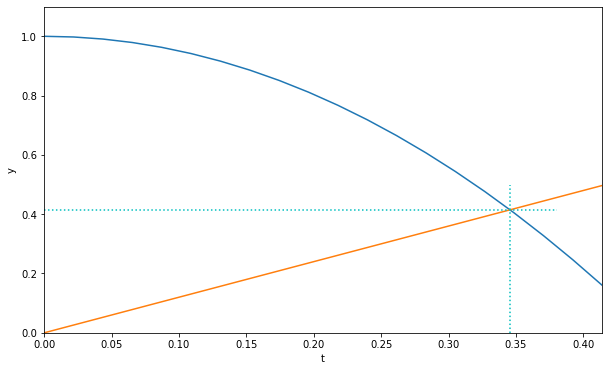

In [17]:
# Creamos el array y lo rellenamos de ceros
y_caida_graf  = np.zeros(len(t_lin))
y_subida_graf = np.zeros(len(t_lin))

# Ahora rellenamos el array con los valores que le corresponden
for  i in range(len(t_lin)):
    y_caida_graf[i]  = y_caida.subs(t,t_lin[i])
    y_subida_graf[i] = y_subida.subs(t,t_lin[i])

# Ahora definimos el tamaño del gráfico a más grande
plt.figure(figsize=(10,6))
# y delimitamos la región a representar => np.int() is deprecate, utilizar int()
plt.xlim(0,int(t_sol*1.2*1e3)/1e3)
plt.ylim(0,1.1)

# Introducimos leyendas
plt.xlabel('t')
plt.ylabel('y')

# Representamos las funciones
plt.plot(t_lin,y_caida_graf)
plt.plot(t_lin,y_subida_graf)

# Marquemos la intersección con una línea larga
# fuente: https://matplotlib.org/stable/gallery/pyplots/axline.html#sphx-glr-gallery-pyplots-axline-py
#plt.axvline(x=t_sol,color='y',linestyle='--')
#plt.axhline(color='gray')

# Marquemos la intersección con líneas cortas  
# plot([x1, x2], [y1, y2], color='k', linestyle='-', linewidth=2)
plt.plot(  [t_sol,t_sol] , [0,y_sol*1.2] , 'c:')  # línea vertical
plt.plot(  [0,t_sol*1.1] , [y_sol,y_sol] , 'c:')  # línea horizontal